In [25]:
import requests
import numpy as np
from matplotlib import pyplot as plt
import cv2

from doctr.models import detection_predictor, recognition_predictor, page_orientation_predictor, crop_orientation_predictor
from doctr.io import DocumentFile
from doctr.utils.geometry import detach_scores

In [3]:
example = "/home/bartek/Kod/PD/praca_dyplomowa/images_100/[0001]_AmberAmethystDaisy_->_Q/Pasted-image-20240518183302.png"

In [7]:
with open(example, "rb") as f:
    image_bytes = f.read()
image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

In [10]:
# Helper function to convert relative coordinates to absolute pixel values
def _to_absolute(geom, img_shape: tuple[int, int]) -> list[list[int]]:
    h, w = img_shape
    if len(geom) == 2:  # Assume straight pages = True -> [[xmin, ymin], [xmax, ymax]]
        (xmin, ymin), (xmax, ymax) = geom
        xmin, xmax = int(round(w * xmin)), int(round(w * xmax))
        ymin, ymax = int(round(h * ymin)), int(round(h * ymax))
        return [[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]]
    else:  # For polygons, convert each point to absolute coordinates
        return [[int(point[0] * w), int(point[1] * h)] for point in geom]

In [12]:
# Define the detection predictor
det_predictor = detection_predictor(
    arch="db_resnet50",
    pretrained=True,
    assume_straight_pages=True,
    symmetric_pad=True,
    preserve_aspect_ratio=True,
    batch_size=1,
).cuda().half()  

In [14]:
docs = DocumentFile.from_images([example])
results = det_predictor(docs)

In [15]:
results

[{'words': array([[0.00195312, 0.97762414, 0.02050781, 0.99151866, 0.42236328],
         [0.12597656, 0.97241369, 0.16503906, 0.99846592, 0.39379883],
         [0.11816406, 0.97588732, 0.13183594, 0.99325547, 0.33740234],
         ...,
         [0.03515625, 0.00674453, 0.0546875 , 0.02758631, 0.38891602],
         [0.01855469, 0.00500771, 0.03320312, 0.02758631, 0.36694336],
         [0.00195312, 0.0032709 , 0.015625  , 0.02758631, 0.33032227]])}]

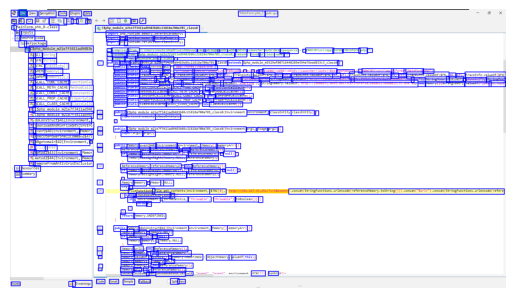

In [17]:
for doc, res in zip(docs, results):
    img_shape = (doc.shape[0], doc.shape[1])
    # Detach the probability scores from the results
    detached_coords, prob_scores = detach_scores([res.get("words")])

    for i, coords in enumerate(detached_coords[0]):
        coords = coords.reshape(2, 2).tolist() if coords.shape == (4,) else coords.tolist()

        # Convert relative to absolute pixel coordinates
        points = np.array(_to_absolute(coords, img_shape), dtype=np.int32).reshape((-1, 1, 2))

        # Draw the bounding box on the image
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)

%matplotlib inline
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()

In [26]:
word_crop = requests.get("https://github.com/mindee/doctr/releases/download/v0.5.1/word-crop.png").content

/home/bartek/Kod/PD/pd_env/lib/python3.12/site-packages/doctr/models/utils/pytorch.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path,

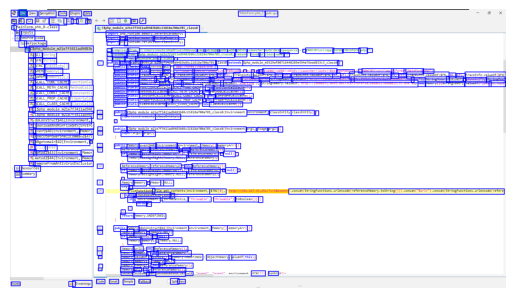

Recognized text: Medet 
with confidence: 1.00


In [27]:
with open(example, "rb") as f:
    image_bytes = f.read()
doc = DocumentFile.from_images([word_crop])
# Define the recognition predictor
rec_predictor = recognition_predictor(arch="parseq", pretrained=True, symmetric_pad=True, batch_size=1).cuda().half()  
result = rec_predictor(doc)

%matplotlib inline
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()
print(f"Recognized text: {result[0][0]} \nwith confidence: {result[0][1]:.2f}")

In [22]:
result

[('-', 0.82861328125)]

In [23]:
doc

[array([[[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],
 
        ...,
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [242, 242, 242],
  